# Aula 1: analisando dados

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [9]:
df = df.rename(columns={
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'remote_ratio': 'remoto',
    'company_size': 'tamanho_empresa',
    'job_title': 'cargo',
    'work_year': 'ano',
    'employee_residence': 'residencia',
    'salary_in_usd': 'usd'
})
df.head()

,ano,senioridade,contrato,cargo,salary,salary_currency,usd,residencia,remoto,company_location,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [10]:
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [12]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [13]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [14]:

senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [15]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [16]:
df.head()

,ano,senioridade,contrato,cargo,salary,salary_currency,usd,residencia,remoto,company_location,tamanho_empresa
0,2025.0,senior,FT,Solutions Engineer,214000,USD,214000,US,remoto,US,M
1,2025.0,senior,FT,Solutions Engineer,136000,USD,136000,US,remoto,US,M
2,2025.0,pleno,FT,Data Engineer,158800,USD,158800,AU,presencial,AU,M
3,2025.0,pleno,FT,Data Engineer,139200,USD,139200,AU,presencial,AU,M
4,2025.0,junior,FT,Data Engineer,90000,USD,90000,US,presencial,US,M


In [17]:
df.describe(include='object')

,senioridade,contrato,cargo,salary_currency,residencia,remoto,company_location,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,FT,Data Scientist,USD,US,presencial,US,M
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Aula 2: limpando e preparando dados

In [18]:
df.head()

,ano,senioridade,contrato,cargo,salary,salary_currency,usd,residencia,remoto,company_location,tamanho_empresa
0,2025.0,senior,FT,Solutions Engineer,214000,USD,214000,US,remoto,US,M
1,2025.0,senior,FT,Solutions Engineer,136000,USD,136000,US,remoto,US,M
2,2025.0,pleno,FT,Data Engineer,158800,USD,158800,AU,presencial,AU,M
3,2025.0,pleno,FT,Data Engineer,139200,USD,139200,AU,presencial,AU,M
4,2025.0,junior,FT,Data Engineer,90000,USD,90000,US,presencial,US,M


In [19]:
df.isnull()

,ano,senioridade,contrato,cargo,salary,salary_currency,usd,residencia,remoto,company_location,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salary,0
salary_currency,0
usd,0
residencia,0
remoto,0
company_location,0


In [21]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [22]:
df[df.isnull().any(axis = 1)]

,ano,senioridade,contrato,cargo,salary,salary_currency,usd,residencia,remoto,company_location,tamanho_empresa
5588,NaN,senior,FT,Product Manager,184500,USD,184500,US,presencial,US,M
59692,NaN,pleno,FT,Engineer,110000,USD,110000,DE,presencial,DE,M
59710,NaN,junior,FT,Data Scientist,208800,USD,208800,US,presencial,US,M
59759,NaN,senior,FT,Software Engineer,135000,USD,135000,US,presencial,US,M
59789,NaN,senior,FT,Engineer,112000,USD,112000,US,presencial,US,M
131000,NaN,senior,FT,Machine Learning Engineer,163800,USD,163800,US,presencial,US,M
131006,NaN,senior,FT,Data Analytics Manager,204500,USD,204500,US,presencial,US,M
133054,NaN,junior,FT,Data Scientist,40000,USD,40000,JP,remoto,MY,L
133281,NaN,pleno,FT,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,L
133317,NaN,pleno,FT,Data Scientist,130000,USD,130000,US,hibrido,US,L


# Lidando com valores nulos
Preenchendo com média e mediana para não desestabilizar a base de dados

In [23]:
import numpy as np

In [24]:
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'salario': [4000, np.nan, 3500, np.nan, 5000]
})

# Preencher com a média salarial
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Preencher com a mediana salarial
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,4166.67,4000.0
2,Carlos,3500.0,3500.00,3500.0
3,Diana,NaN,4166.67,4000.0
4,Eduardo,5000.0,5000.00,5000.0


# Exemplo de preenchimento com o valor anterior
Usar ffill (forward fill)

In [25]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


# Exemplo de preenchimento com o valor posterior
Usar bfill (backward fill)

In [26]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_corrigida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_corrigida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


# Tratando o nosso DataFrame
## Removendo os dados nulos
Remoção das linhas com anos nulos:

In [27]:
df_limpo = df.dropna()

In [28]:
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salary,0
salary_currency,0
usd,0
residencia,0
remoto,0
company_location,0


# Alterando o tipo de dados
Deixar o ano como número inteiro:

In [29]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salary,salary_currency,usd,residencia,remoto,company_location,tamanho_empresa
0,2025.0,senior,FT,Solutions Engineer,214000,USD,214000,US,remoto,US,M
1,2025.0,senior,FT,Solutions Engineer,136000,USD,136000,US,remoto,US,M
2,2025.0,pleno,FT,Data Engineer,158800,USD,158800,AU,presencial,AU,M
3,2025.0,pleno,FT,Data Engineer,139200,USD,139200,AU,presencial,AU,M
4,2025.0,junior,FT,Data Engineer,90000,USD,90000,US,presencial,US,M


In [30]:
df_limpo = df_limpo.assign(ano=df_limpo['ano'].astype('Int64'))

In [31]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salary,salary_currency,usd,residencia,remoto,company_location,tamanho_empresa
0,2025,senior,FT,Solutions Engineer,214000,USD,214000,US,remoto,US,M
1,2025,senior,FT,Solutions Engineer,136000,USD,136000,US,remoto,US,M
2,2025,pleno,FT,Data Engineer,158800,USD,158800,AU,presencial,AU,M
3,2025,pleno,FT,Data Engineer,139200,USD,139200,AU,presencial,AU,M
4,2025,junior,FT,Data Engineer,90000,USD,90000,US,presencial,US,M


# Criando gráficos e storytelling

# Criando um gráfico com a própria biblioteca Pandas
Qual o nível de experiência mais comum na base de dados?

<Axes: title={'center': 'Distribuição dos níveis de experiência'}, xlabel='senioridade'>

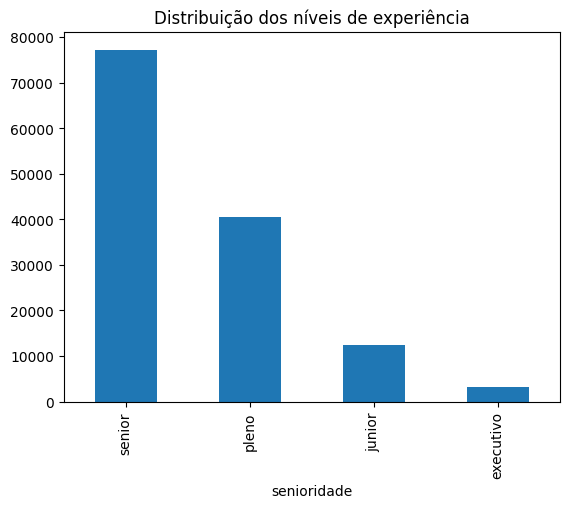

In [32]:
df['senioridade'].value_counts().plot(kind="bar", title="Distribuição dos níveis de experiência")

# Criando o primeiro gráfico com Seaborn

In [33]:
import seaborn as sns

Qual é a média salarial por nível de senioridade?   

<Axes: xlabel='senioridade', ylabel='usd'>

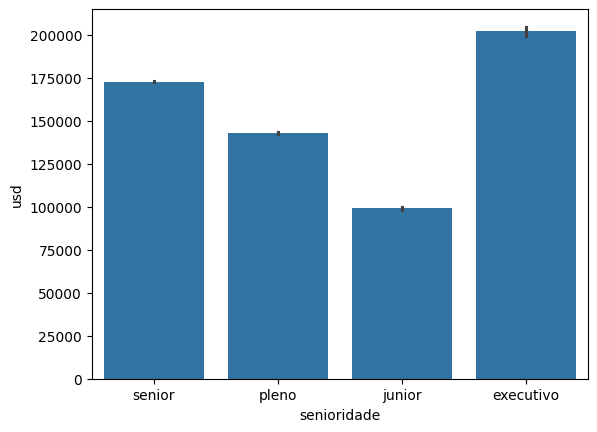

In [34]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

# Formatando o gráfico com Matplotlib

In [35]:
import matplotlib.pyplot as plt

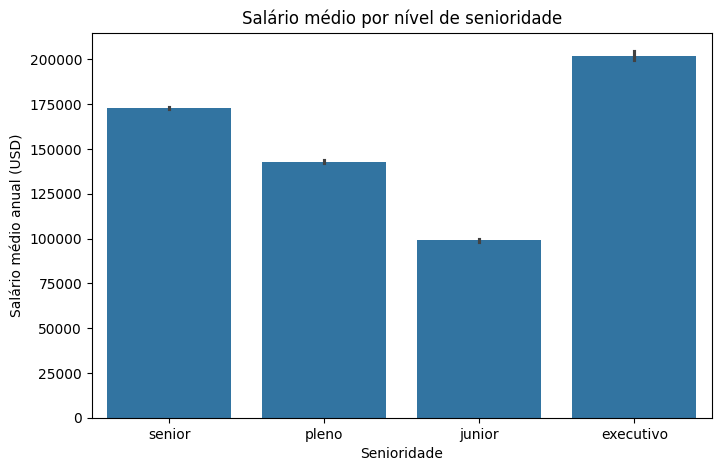

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

## Ordenando as categorias do maior para o menor valor:

In [37]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
executivo,202027.667813
senior,172850.838301
pleno,143044.845979
junior,99034.963267


In [38]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

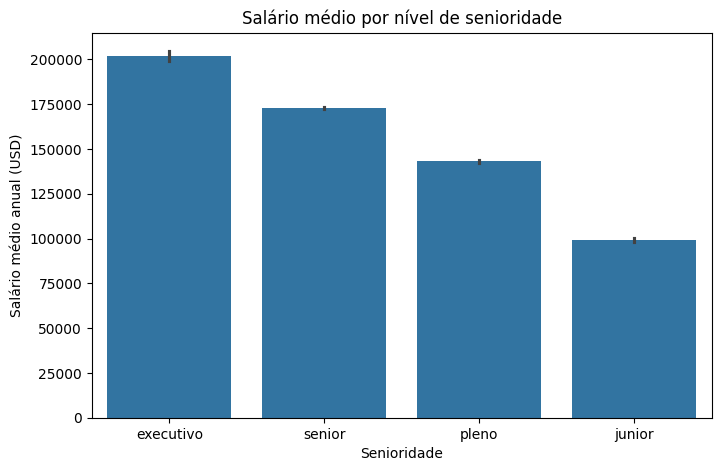

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

# Analisando a distribuição dos salários

Histograma

Text(0, 0.5, 'Frequência')

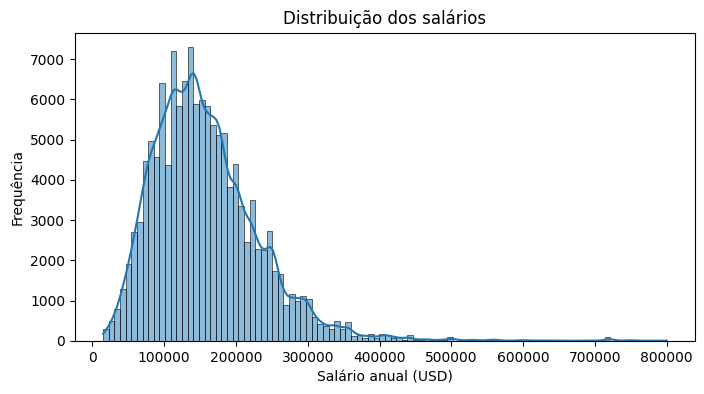

In [40]:
plt.figure(figsize=(8, 4))
sns.histplot(df_limpo['usd'], bins=100, kde=True)
plt.title('Distribuição dos salários')
plt.xlabel('Salário anual (USD)')
plt.ylabel('Frequência')

Boxplot

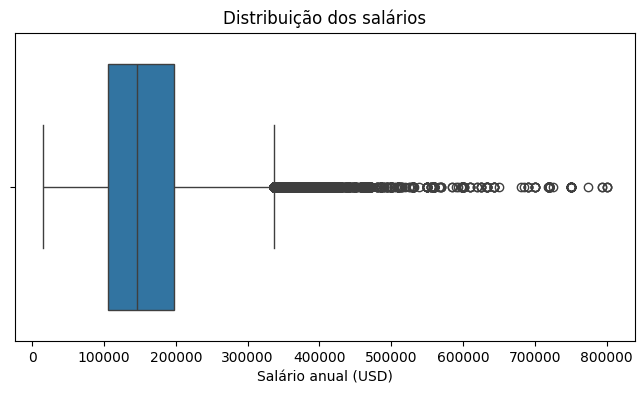

In [41]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_limpo['usd'])
plt.title('Distribuição dos salários')
plt.xlabel('Salário anual (USD)')
plt.show()

# Como é a distribuição dos salários de acordo com níveis de senioridade?

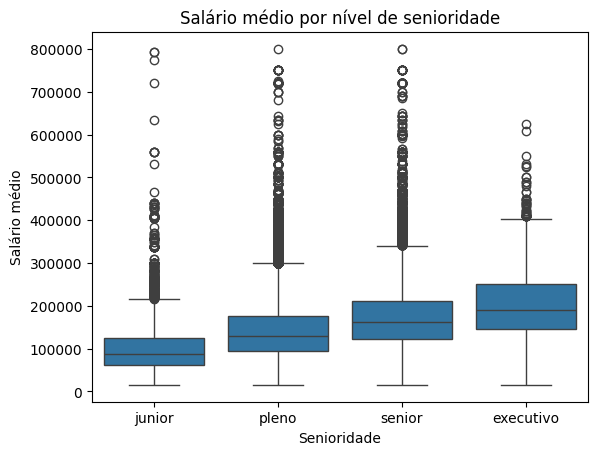

In [42]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio')
plt.show()

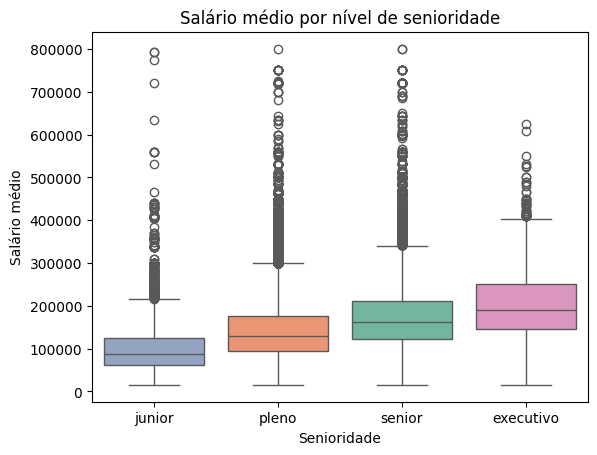

In [43]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Salário médio por nível de senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio')
plt.show()

# Qual país paga o maior média salarial para cientistas de dados especificamente?

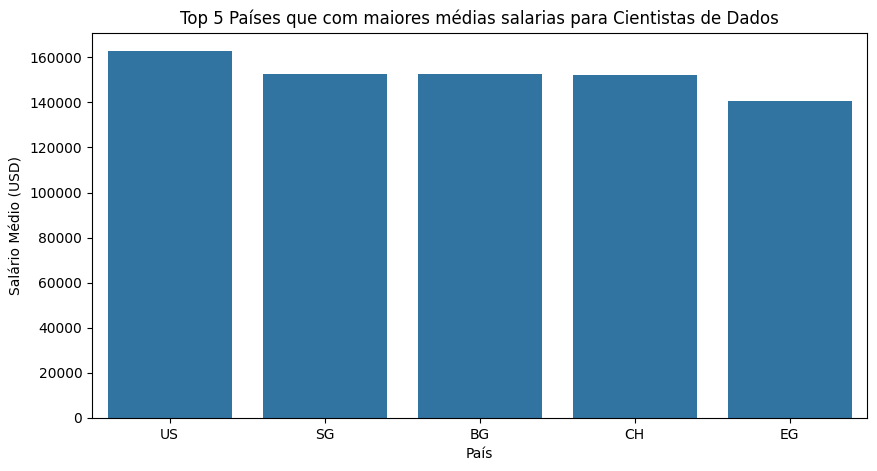

In [44]:
df_ds = df_limpo[df_limpo['cargo'] == 'Data Scientist']
media_ds = df_ds.groupby('residencia')['usd'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='residencia', y='usd', data=media_ds.head(5))
plt.title('Top 5 Países que com maiores médias salarias para Cientistas de Dados')
plt.xlabel('País')
plt.ylabel('Salário Médio (USD)')
plt.show()

US - Estados Unidos

SG - Singapura

BG - Bulgária

CH - Suiça

EG - Egito

# Criando gráficos interativos com Plotly

In [45]:
import plotly.express as px

In [46]:
# Calcular média salarial
media_senioridade = df_limpo.groupby('senioridade')['usd'].mean().reset_index()

# Criar gráfico
fig = px.bar(media_senioridade, x='senioridade', y='usd',
             title='Salário Médio por Nível de Senioridade',
             labels={'senioridade': 'Senioridade', 'usd': 'Salário Médio (USD)'},
             color='senioridade')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

Qual é a proporção dos tipos de trabalho?

In [47]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos Tipos de Trabalho',
    hole=0.5  # opcional: transforma em donut chart
)
fig.update_traces(textinfo='percent+label')
fig.show()

In [48]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Proporção dos tipos de trabalho',
    # hole=0.5
)
fig.update_traces(textinfo='percent+label')
fig.show()